<a href="https://colab.research.google.com/github/YasmineJiang/codespace/blob/main/Predictive_Modeling_for_British_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis before Modeling**

In [1]:
#Libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df[df['booking_complete'] == 1]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,1,Internet,RoundTrip,33,6,6,Wed,PENTPE,Taiwan,1,1,0,4.67,1
49977,2,Internet,RoundTrip,15,6,16,Tue,PENTPE,Malaysia,1,1,1,4.67,1
49980,4,Internet,RoundTrip,242,6,9,Tue,PENXIY,Malaysia,1,0,1,5.00,1
49984,2,Internet,RoundTrip,7,6,4,Wed,PERPNH,Australia,0,0,0,5.62,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

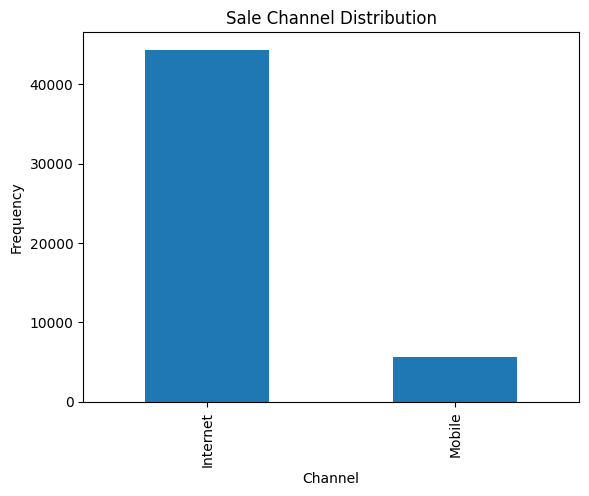

In [6]:
#Visualizations
#Bar chart for sale channels
channel_count = df['sales_channel'].value_counts()
channel_count.plot(kind='bar')
plt.title('Sale Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Frequency')
channel_count

Text(0, 0.5, 'Frequency')

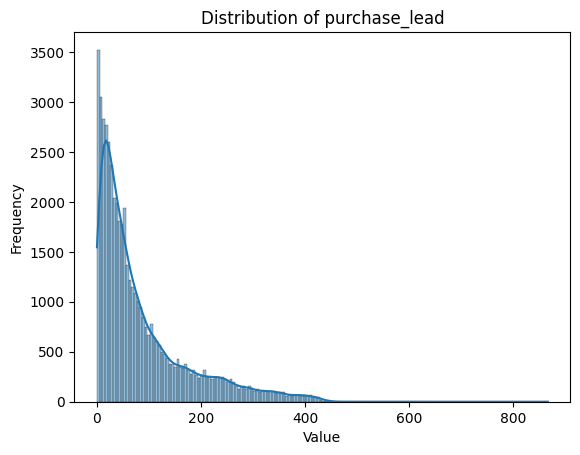

In [7]:
#Distribution of purchase lead
sns.histplot(df['purchase_lead'], kde=True)
plt.title('Distribution of purchase_lead')
plt.xlabel('Value')
plt.ylabel('Frequency')

<ipython-input-8-3647bcbd3c43>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

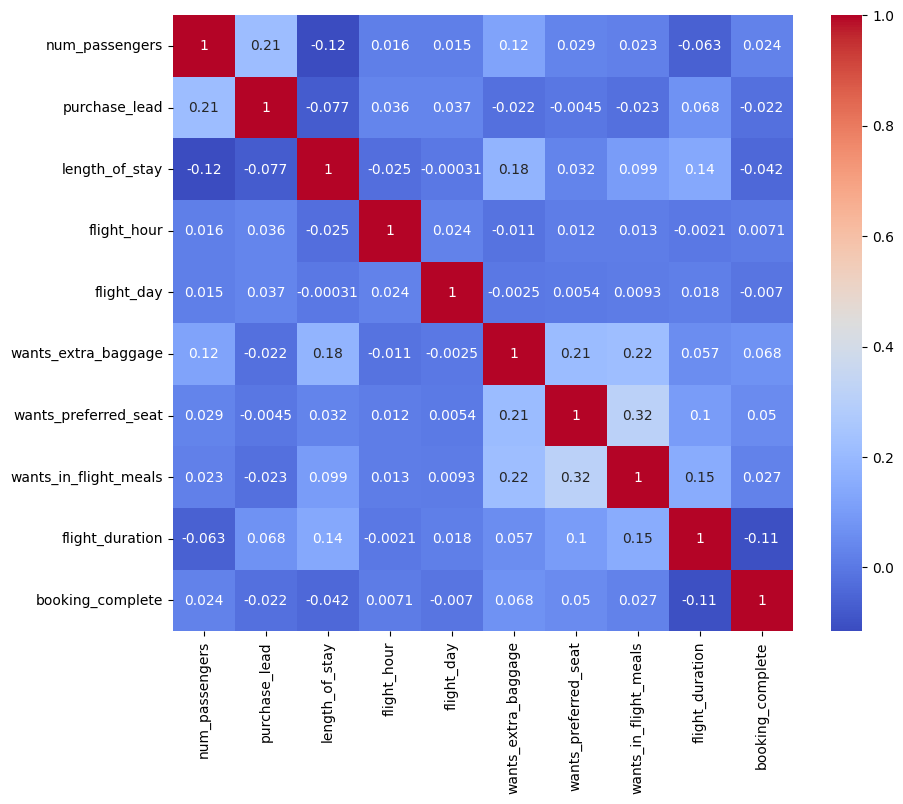

In [8]:
#Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# **Data Modeling**

In [9]:
#Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [10]:
X = df[['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration']]
y = df['booking_complete']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

# **Model Evaluation(Random Forest)**

In [12]:
#Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[12505   195]
 [ 2154   146]]


In [13]:
#Cross validation
scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.64 (+/- 0.44)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12700
           1       0.43      0.06      0.11      2300

    accuracy                           0.84     15000
   macro avg       0.64      0.52      0.51     15000
weighted avg       0.79      0.84      0.79     15000



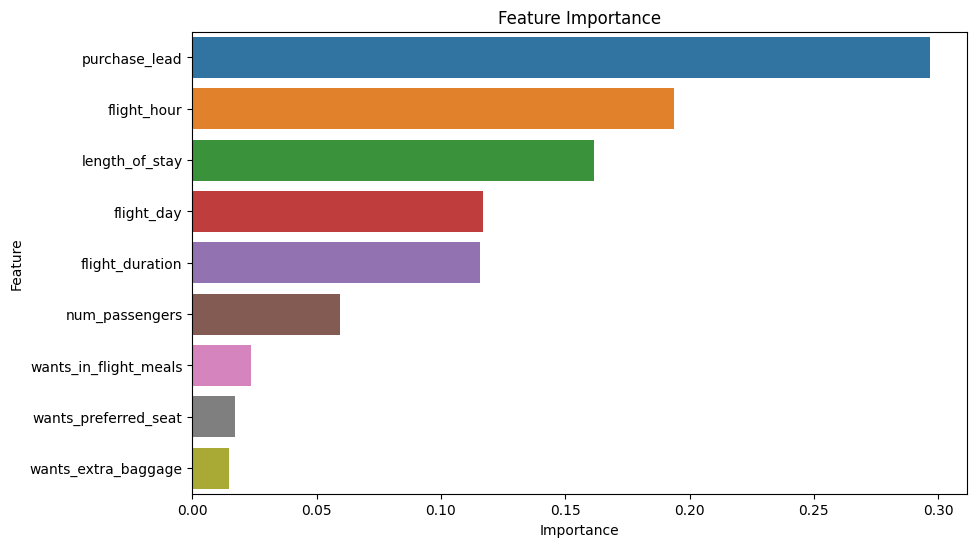

array([0.05934909, 0.29684367, 0.16174052, 0.19387545, 0.11710187,
       0.0146461 , 0.01705069, 0.02381636, 0.11557627])

In [14]:
#Feature importance analysis
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame to plot it
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
importances